In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display_png
%matplotlib inline

In [2]:
df = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


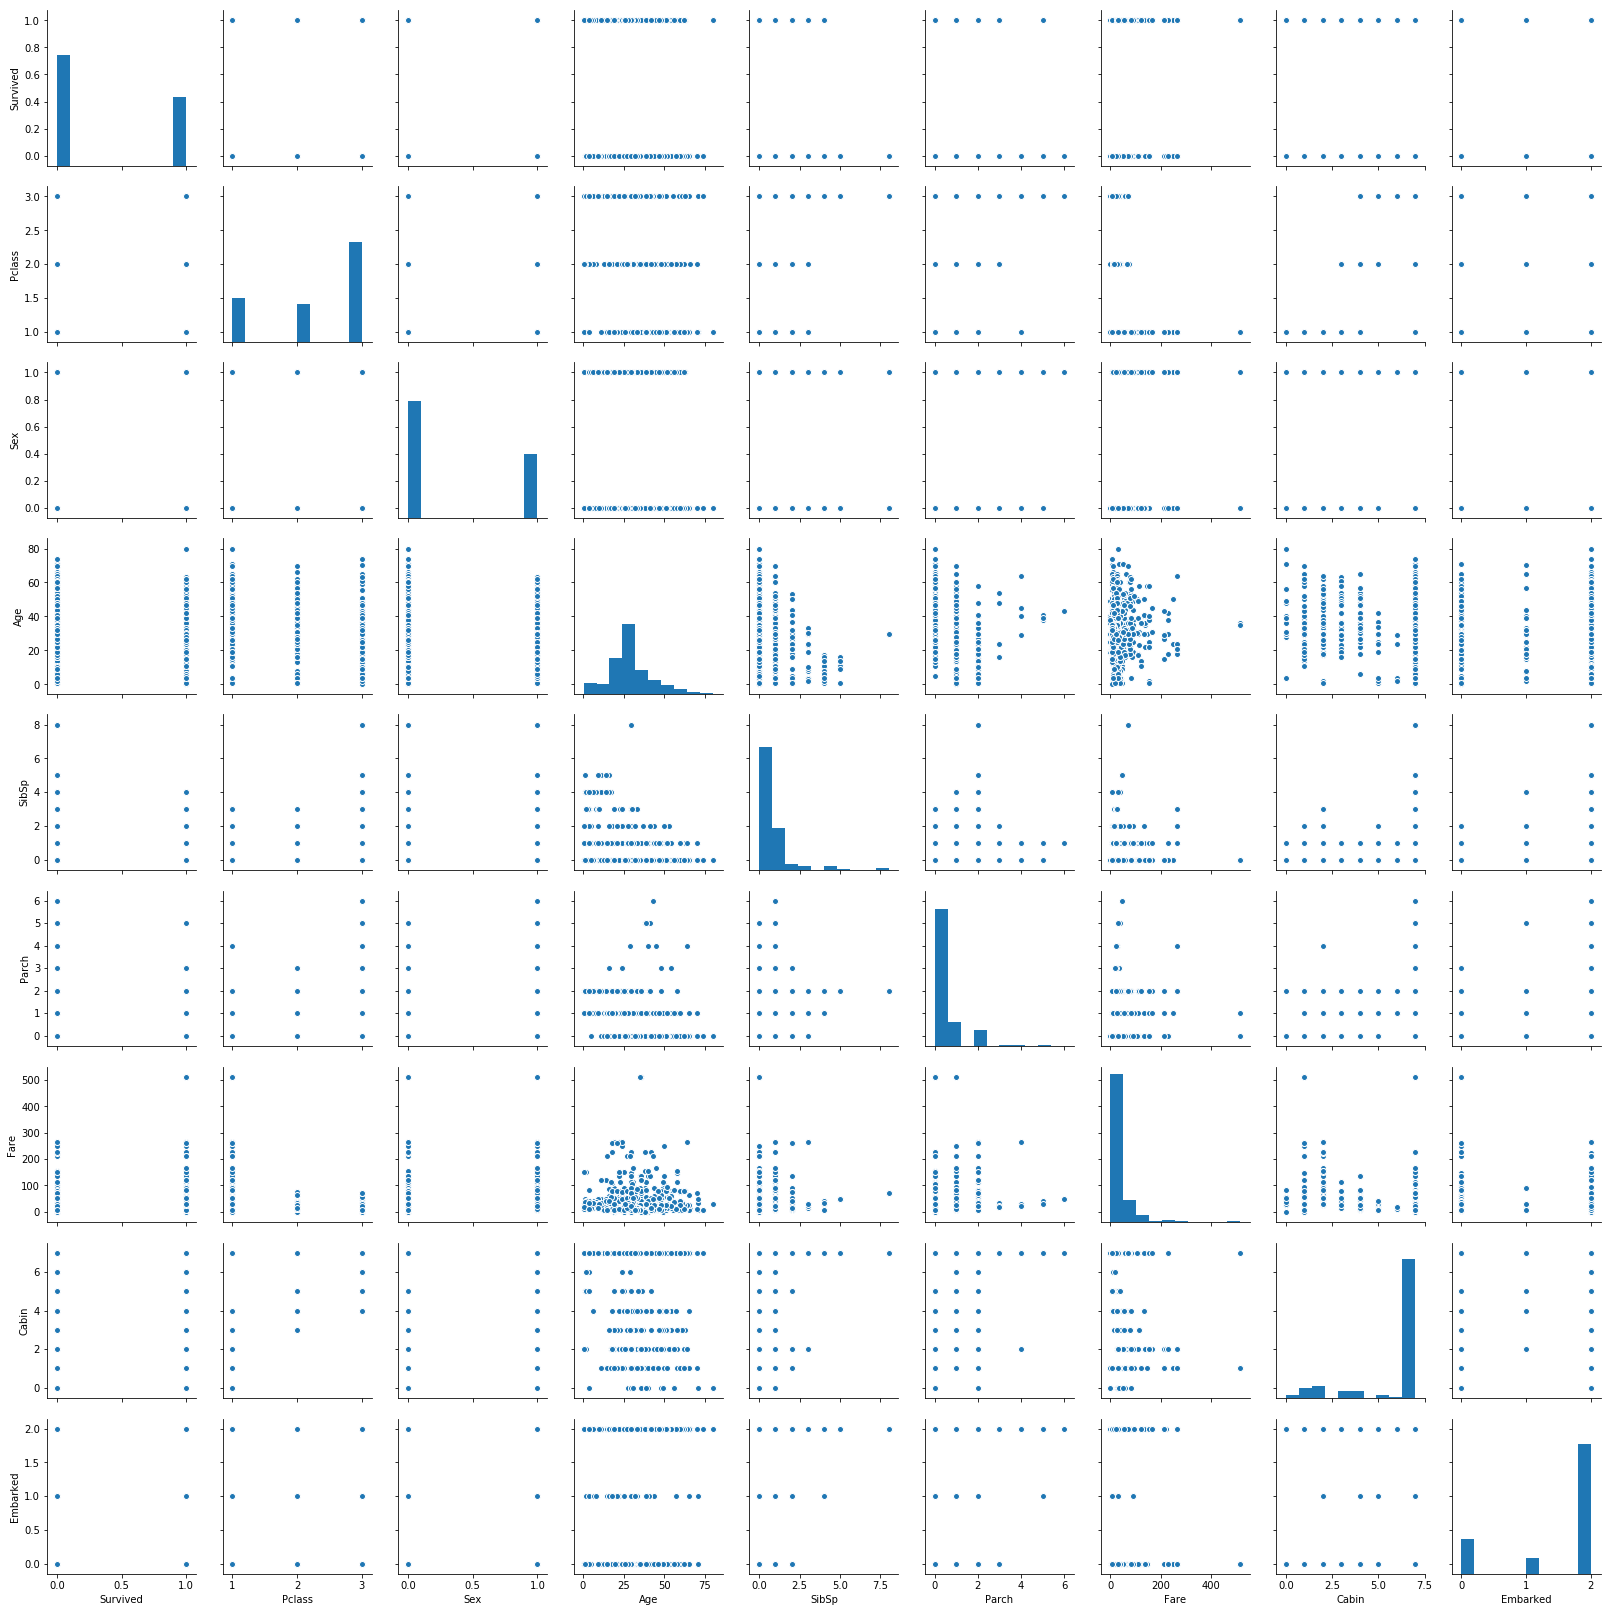

In [4]:
df_sample = df.copy()

df_sample.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
df_sample['Sex'] = df_sample['Sex'].map({'male': 0, 'female': 1})
df_sample['Embarked'] = df_sample['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_sample['Cabin'] = df_sample['Cabin'].apply(lambda x: str(x)[0]).map({
    'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'T': 7, 'n': 7
})
df_sample['Age'] = df_sample['Age'].fillna(df_sample['Age'].mean())
df_sample['Embarked'] = df_sample['Embarked'].fillna(0)

sns.pairplot(df_sample);

In [5]:
corr_mat = df_sample.corr(method='pearson')
corr_mat

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Survived,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.294804,-0.174199
Pclass,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500,0.743251,0.170334
Sex,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333,-0.118282,-0.115513
Age,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.249842,-0.035479
SibSp,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651,0.041333,0.070653
Parch,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225,-0.031308,0.042325
Fare,0.257307,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000,-0.525994,-0.229304
Cabin,-0.294804,0.743251,-0.118282,-0.249842,0.041333,-0.031308,-0.525994,1.000000,0.212016
Embarked,-0.174199,0.170334,-0.115513,-0.035479,0.070653,0.042325,-0.229304,0.212016,1.000000


In [6]:
df_sample = df.copy()

# 相関の低い列を削除
df_sample.drop(['PassengerId', 'Name', 'Ticket', 'Age', 'SibSp', 'Parch'], axis=1, inplace=True)

df_sample['Cabin'] = df_sample['Cabin'].apply(lambda x: str(x)[0])
df_cabin = pd.get_dummies(df_sample['Cabin'])

df_embarked = pd.get_dummies(df_sample['Embarked'])
df_embarked = df_embarked.rename(columns={'C': 'Em_C', 'Q': 'Em_Q', 'S': 'Em_S'})

df_sample.drop(['Cabin', 'Embarked'], axis=1, inplace=True)
df_sample = pd.concat([df_sample, df_cabin], axis=1)
df_sample = pd.concat([df_sample, df_embarked], axis=1)

corr_mat = df_sample.corr(method='pearson')
corr_mat

,Survived,Pclass,Fare,A,B,C,D,E,F,G,T,n,Em_C,Em_Q,Em_S
Survived,1.000000,-0.338481,0.257307,0.022287,0.175095,0.114652,0.150716,0.145321,0.057935,0.016040,-0.026456,-0.316912,0.168240,0.003650,-0.155660
Pclass,-0.338481,1.000000,-0.549500,-0.204934,-0.369572,-0.417048,-0.278690,-0.230091,0.011063,0.055561,-0.052496,0.725541,-0.243292,0.221009,0.081720
Fare,0.257307,-0.549500,1.000000,0.019549,0.386297,0.364318,0.098878,0.053717,-0.033093,-0.025180,0.002224,-0.482075,0.269335,-0.117216,-0.166603
A,0.022287,-0.204934,0.019549,1.000000,-0.030880,-0.034846,-0.025663,-0.025256,-0.015923,-0.008787,-0.004386,-0.240136,0.093040,-0.040246,-0.055383
B,0.175095,-0.369572,0.386297,-0.030880,1.000000,-0.062841,-0.046280,-0.045547,-0.028715,-0.015847,-0.007910,-0.433053,0.168642,-0.072579,-0.123057
C,0.114652,-0.417048,0.364318,-0.034846,-0.062841,1.000000,-0.052225,-0.051398,-0.032403,-0.017883,-0.008926,-0.488683,0.113952,-0.049776,-0.066995
D,0.150716,-0.278690,0.098878,-0.025663,-0.046280,-0.052225,1.000000,-0.037852,-0.023864,-0.013170,-0.006574,-0.359896,0.102977,-0.060318,-0.051139
E,0.145321,-0.230091,0.053717,-0.025256,-0.045547,-0.051398,-0.037852,1.000000,-0.023486,-0.012961,-0.006470,-0.354194,-0.015939,-0.037897,0.038685
F,0.057935,0.011063,-0.033093,-0.015923,-0.028715,-0.032403,-0.023864,-0.023486,1.000000,-0.008171,-0.004079,-0.223299,-0.034726,-0.004113,0.033537
G,0.016040,0.055561,-0.025180,-0.008787,-0.015847,-0.017883,-0.013170,-0.012961,-0.008171,1.000000,-0.002251,-0.123234,-0.032371,-0.020654,0.041589


In [7]:
def preprocessing2(df):
    # Name, Ticket, Cabin列の削除
    df.drop(['PassengerId', 'Name', 'Ticket', 'Age', 'SibSp', 'Parch', 'Cabin'], axis=1, inplace=True)

    # Sex列の変換 male:0 female: 1
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    
    # Fare列のNaNを平均値で補完
    df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

    # Embarked列をOne-hotエンコード
    df['Embarked'] = df['Embarked'].fillna('S')
    df_embarked = pd.get_dummies(df['Embarked'])

    df.drop(['Embarked'], axis=1, inplace=True)
    df = pd.concat([df, df_embarked], axis=1)
    return df

In [8]:
df2 = df.copy()

df2 = preprocessing2(df2)
df2.head()

,Survived,Pclass,Sex,Fare,C,Q,S
0,0,3,0,7.2500,0,0,1
1,1,1,1,71.2833,1,0,0
2,1,3,1,7.9250,0,0,1
3,1,1,1,53.1000,0,0,1
4,0,3,0,8.0500,0,0,1


In [9]:
X2_train = df2.iloc[:, 1:].values
y2_train = df2.iloc[:, 0].values
X2_train[:5, :]

array([[ 3.    ,  0.    ,  7.25  ,  0.    ,  0.    ,  1.    ],
       [ 1.    ,  1.    , 71.2833,  1.    ,  0.    ,  0.    ],
       [ 3.    ,  1.    ,  7.925 ,  0.    ,  0.    ,  1.    ],
       [ 1.    ,  1.    , 53.1   ,  0.    ,  0.    ,  1.    ],
       [ 3.    ,  0.    ,  8.05  ,  0.    ,  0.    ,  1.    ]])

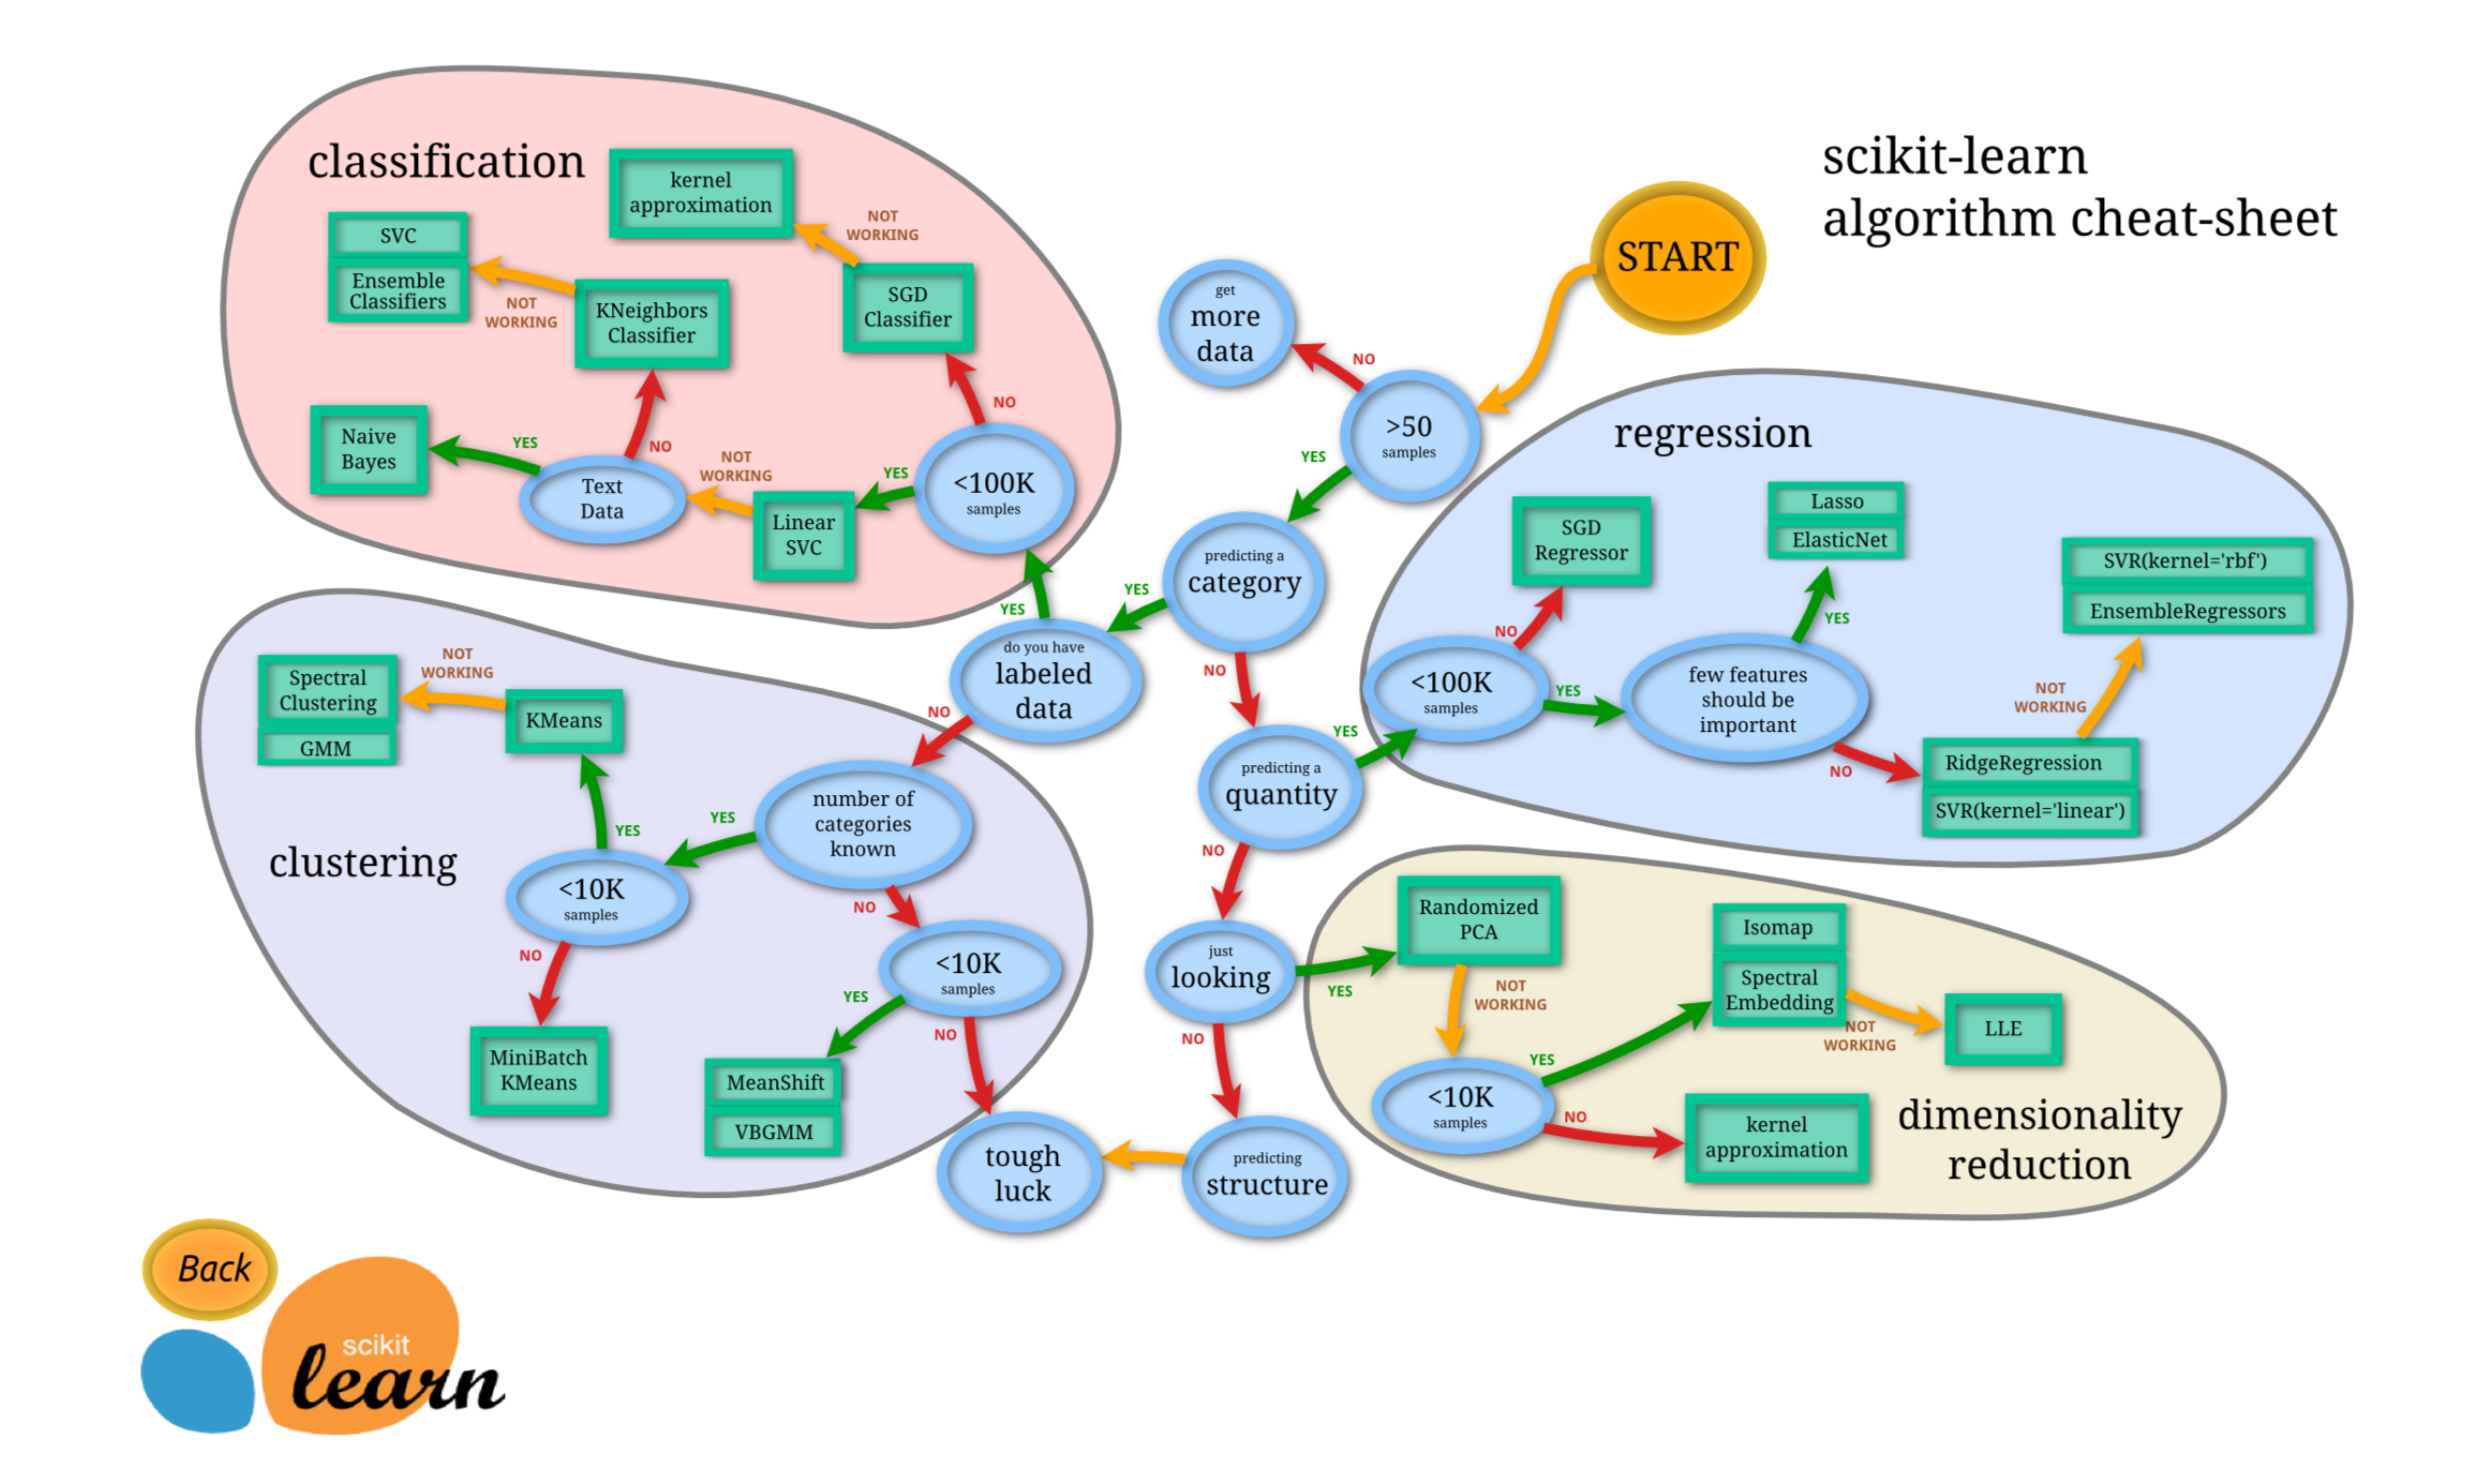

In [10]:
display_png(Image('./output/scikit-learn_algorithm_cheatsheet.png'))

In [11]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C=1.0, random_state=0)
svc.fit(X2_train, y2_train)
svc.score(X2_train, y2_train)

0.7822671156004489

In [12]:
df_test2 = df_test.copy()
df_test2 = preprocessing2(df_test2)
df_test2.head()

,Pclass,Sex,Fare,C,Q,S
0,3,0,7.8292,0,1,0
1,3,1,7.0000,0,0,1
2,2,0,9.6875,0,1,0
3,3,0,8.6625,0,0,1
4,3,1,12.2875,0,0,1


In [13]:
predictions = svc.predict(df_test2.iloc[:, :].values)
predictions.shape

(418,)

In [14]:
df_out = df_test.copy()
df_out['Survived'] = predictions

df_out[['PassengerId', 'Survived']].to_csv('./output/submission2.csv',index=False)

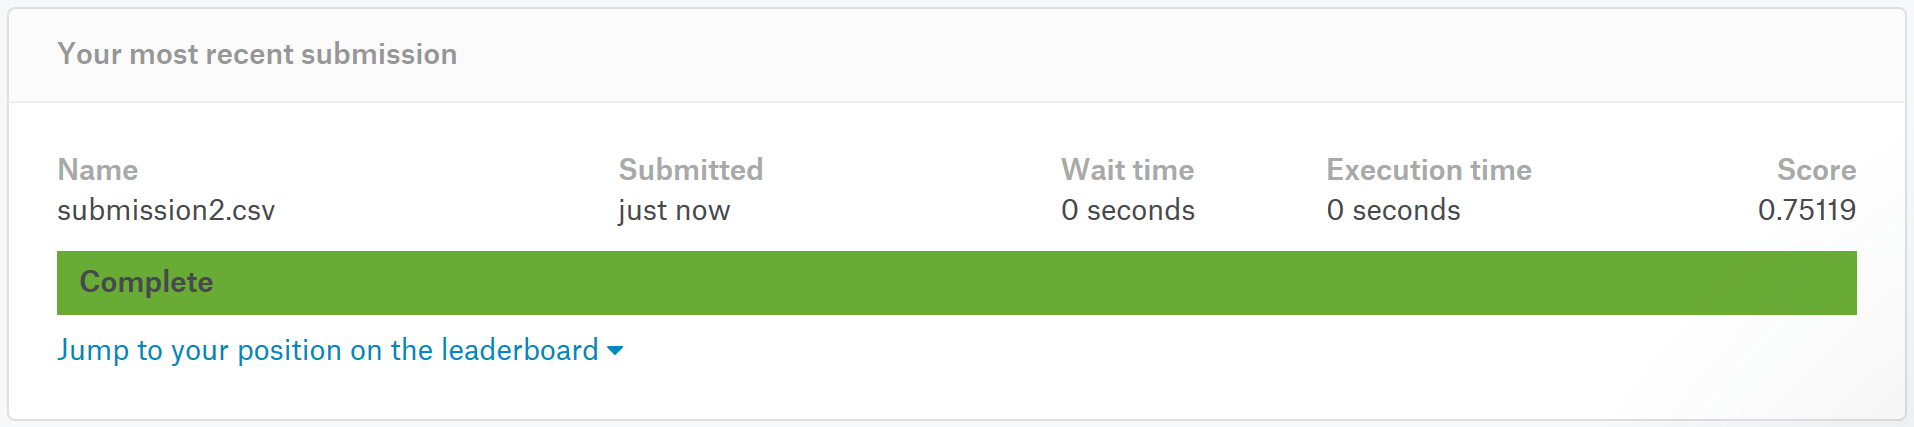

In [15]:
display_png(Image('./output/score2.png'))